In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal, glorot_uniform
from keras.regularizers import l1, l2
from tensorflow.keras.utils import to_categorical

In [4]:
df_train = pd.read_pickle('../../Base de datos/Processed/train_clean.pkl')
df_train

,feature_2,feature_4,feature_6,feature_7,feature_13,feature_14,feature_15,feature_16,feature_17,feature_20,...,feature_197,feature_201,feature_204,feature_207,feature_208,feature_212,feature_216,feature_217,feature_218,target
0,1.0,0.000000,0.000000,0.190514,0.0,0.001558,0.866242,0.1338,3.0,0.008772,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
1,0.5,-1.000000,0.000649,0.000000,0.0,0.000000,-1.000000,0.0000,3.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
2,1.0,0.000102,0.000000,0.571429,0.0,0.000000,-1.000000,0.0000,3.0,0.000000,...,0.051724,0.054765,0.000114,0.022232,0.050545,0.000562,0.020597,0.020891,1.0,1.0
3,0.5,0.000000,0.001299,0.087886,0.0,0.000011,0.013514,0.0000,2.0,0.035088,...,0.034483,0.042598,0.012136,0.013420,0.026187,0.003375,0.020597,0.002580,0.0,1.0
4,0.0,0.000000,0.009740,0.134400,0.0,0.000069,0.113208,0.0000,3.0,0.008772,...,0.040230,0.041252,0.008640,0.004438,0.050889,0.003375,0.020597,0.002613,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472417,0.0,0.000000,0.018182,0.285714,0.0,0.000011,0.006849,0.0000,3.0,0.052632,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
472418,0.5,0.000105,0.005844,0.114286,0.0,0.000653,0.712500,0.0000,3.0,0.000000,...,0.022989,0.045631,0.007853,0.050161,0.115419,0.004499,0.020597,0.003336,1.0,1.0
472419,0.5,0.000164,0.003247,0.142857,0.0,0.000103,0.321429,0.2500,3.0,0.000000,...,0.178161,0.035461,0.006282,0.003414,0.024191,0.016873,0.020597,0.004713,0.0,1.0
472420,0.5,0.000000,0.010390,0.285714,0.0,0.000000,-1.000000,0.0000,4.0,0.000000,...,0.011494,0.058859,0.011526,0.182743,0.040467,0.000562,0.112085,0.001517,1.0,1.0


In [5]:
df_temp = pd.read_pickle('../../Base de datos/Processed/nn_challenge_test_clean.pkl')
df_temp

,feature_2,feature_4,feature_6,feature_7,feature_13,feature_14,feature_15,feature_16,feature_17,feature_20,...,feature_197,feature_201,feature_204,feature_207,feature_208,feature_212,feature_216,feature_217,feature_218,target
0,0.5,-1.000000,0.000682,0.000000,0.0,0.000000,-1.000000,0.0000,3.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
1,0.5,0.000000,0.001364,0.089721,0.0,0.000031,0.013166,0.0000,2.0,0.039216,...,0.034483,0.042598,0.012136,0.013420,0.026187,0.003963,0.020597,0.002580,0.0,1.0
2,0.5,0.000000,0.002046,0.424221,0.0,0.000000,-1.000000,0.0000,7.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
3,1.0,0.000018,0.015007,0.583363,0.0,0.000124,0.113974,0.0000,3.0,0.000000,...,0.022989,0.042971,0.001849,0.011287,0.029193,0.005945,0.199603,0.004473,0.0,1.0
4,1.0,0.000259,0.042974,0.583363,0.0,0.005125,0.877616,0.0106,3.0,0.009804,...,0.017241,0.056945,0.008079,0.000320,0.216927,0.001321,0.106760,0.005346,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270950,0.0,0.000000,0.019100,0.291681,0.0,0.000031,0.006499,0.0000,3.0,0.058824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
270951,0.5,0.000105,0.006139,0.116673,0.0,0.001770,0.712399,0.0000,3.0,0.000000,...,0.022989,0.045631,0.007853,0.050161,0.115419,0.005284,0.020597,0.003336,1.0,1.0
270952,0.5,0.000164,0.003411,0.145841,0.0,0.000280,0.321189,0.2500,3.0,0.000000,...,0.178161,0.035461,0.006282,0.003414,0.024191,0.019815,0.020597,0.004713,0.0,1.0
270953,0.5,0.000000,0.010914,0.291681,0.0,0.000000,-1.000000,0.0000,4.0,0.000000,...,0.011494,0.058859,0.011526,0.182743,0.040467,0.000661,0.112085,0.001517,1.0,1.0


# Balanceo de datos

In [6]:
X_train = df_train.drop(columns = ['target'])
y_train = df_train['target']

In [7]:
X_temp = df_temp.drop(columns = ['target'])
y_temp = df_temp['target']

# Reescalamos datos

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [9]:
X_train

array([[ 1.40694199,  0.28807827, -0.2258945 , ..., -0.55221468,
        -0.30226032,  0.72716028],
       [-0.13580362, -3.43594233, -0.21439193, ..., -0.55221468,
        -0.30226032,  0.72716028],
       [ 1.40694199,  0.28845991, -0.2258945 , ..., -0.35352694,
         0.98889472,  0.72716028],
       ...,
       [-0.13580362,  0.28868776, -0.16838165, ..., -0.35352694,
        -0.01099016, -1.34601075],
       [-0.13580362,  0.28807827, -0.04185339, ...,  0.5290043 ,
        -0.20849423,  0.72716028],
       [-1.67854923,  0.28807827, -0.14537651, ..., -0.32616762,
        -0.06998827,  0.72716028]])

In [10]:
X_temp = scaler.fit_transform(X_temp)

In [11]:
X_temp

array([[-0.12929755, -3.46860024, -0.55628111, ..., -0.54423812,
        -0.27941414,  0.72411526],
       [-0.12929755,  0.28567894, -0.53062369, ..., -0.34715036,
        -0.14337864, -1.38099562],
       [-0.12929755,  0.28567894, -0.50496626, ..., -0.54423812,
        -0.27941414,  0.72411526],
       ...,
       [-0.12929755,  0.28629338, -0.45365141, ..., -0.34715036,
        -0.0309148 , -1.38099562],
       [-0.12929755,  0.28567894, -0.17141977, ...,  0.52827406,
        -0.1994169 ,  0.72411526],
       [-1.65609172,  0.28567894, -0.40233657, ..., -0.32001137,
        -0.08124948,  0.72411526]])

In [12]:
from sklearn.model_selection import train_test_split

# Luego, dividimos el conjunto temporal en conjuntos de validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((472422, 137), (135477, 137), (135478, 137), (472422,), (135477,), (135478,))

In [13]:
np.shape(X_val)

(135477, 137)

In [14]:
y_val

10885     1.0
122065    1.0
104221    1.0
222013    1.0
192297    1.0
         ... 
119879    1.0
259178    1.0
131932    0.0
146867    0.0
121958    1.0
Name: target, Length: 135477, dtype: float64

# Unimos coeficeintes con datos

In [30]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [31]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(137,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

# Mezclar y procesar por lotes los conjuntos de datos

In [32]:
BATCH_SIZE = 1000
SHUFFLE_BUFFER_SIZE = 1000

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Creación del modelo

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.regularizers import l1

model = Sequential()

# Flatten layer
model.add(Flatten(input_shape=(137,)))

# Batch normalization
model.add(BatchNormalization())

# First set of dense layers
model.add(Dense(120, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(120, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(120, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))


# Second set of dense layers
model.add(Dense(60, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(60, activation='relu', kernel_initializer='glorot_uniform'))

# Dropout layer
model.add(Dropout(0.2))

# Another batch normalization
model.add(BatchNormalization())

# Output layer
model.add(Dense(1, activation='sigmoid'))




In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 137)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 137)              548       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 120)               16560     
                                                                 
 dense_7 (Dense)             (None, 120)               14520     
                                                                 
 dense_8 (Dense)             (None, 120)               14520     
                                                                 
 dropout_2 (Dropout)         (None, 120)               0         
                                                      

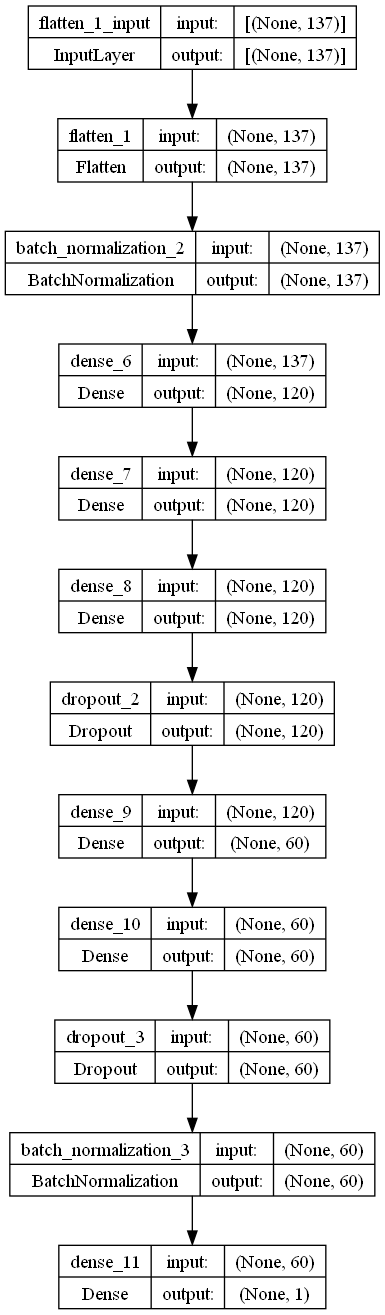

In [35]:
keras.utils.plot_model(model,show_shapes=True)

# Entrenamos el modelo

In [36]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001,clipvalue=100.0)

In [37]:
def total_mae_loss(y_true, y_pred):
    total_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    tf.print(y_true, summarize = -1)
    tf.print(y_pred, summarize = -1)
    return total_loss

In [38]:
def brier_score(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [43]:
model.compile(optimizer= optimizer,
              loss= 'binary_crossentropy',
              metrics=[brier_score, 'accuracy'])

In [44]:
def scheduler(epoch, lr):
    if epoch < 200:
        return 0.001
    elif epoch >= 200 and epoch <= 1000:
        slope = (0.000001 - 0.001) / (1000 - 200)
        intercept = 0.001 - (slope * 200)
        return slope * epoch + intercept
    else:
        return 0.000001  # Mantener el learning rate en 0.000001 para épocas mayores a 1000 si es necesario

In [45]:
class PrintLastBatch(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        for batch, (x, y) in enumerate(val_dataset):  # Cambia 'val_dataset' por 'train_dataset' si deseas usar datos de entrenamiento
            pass  # Este bucle se ejecutará hasta el último batch
        
        y_pred = self.model.predict(x)
        
        tf.print("Último y_true de la época:", y, summarize=-1)
        tf.print("Último y_pred de la época:", y_pred, summarize=-1)

In [46]:
val_epochs = 1000

early_stop = tf.keras.callbacks.EarlyStopping( monitor = 'val_accuracy', patience = 1000,verbose = 1, 
                                              restore_best_weights = True)

class_weights = {0: 1, 1: .16}  # asigna más peso a la clase 0


reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(train_dataset, validation_data=val_dataset, epochs= val_epochs, callbacks=[reduce_lr, early_stop],
                    class_weight=class_weights)
#history = model.fit(train_dataset, validation_data=val_dataset, epochs= val_epochs, callbacks=[reduce_lr, early_stop, PrintLastBatch()],
#                    class_weight=class_weights)

Epoch 1/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1684 - brier_score: 0.2219 - accuracy: 0.5932 - val_loss: 0.8058 - val_brier_score: 0.3042 - val_accuracy: 0.3081 - lr: 0.0010
Epoch 2/1000
473/473 [==============================] - 3s 5ms/step - loss: 0.1668 - brier_score: 0.2234 - accuracy: 0.5781 - val_loss: 0.8176 - val_brier_score: 0.3102 - val_accuracy: 0.2802 - lr: 0.0010
Epoch 3/1000
473/473 [==============================] - 3s 5ms/step - loss: 0.1662 - brier_score: 0.2224 - accuracy: 0.5812 - val_loss: 0.8180 - val_brier_score: 0.3098 - val_accuracy: 0.2933 - lr: 0.0010
Epoch 4/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1657 - brier_score: 0.2222 - accuracy: 0.5800 - val_loss: 0.7877 - val_brier_score: 0.2929 - val_accuracy: 0.3384 - lr: 0.0010
Epoch 5/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1654 - brier_score: 0.2214 - accuracy: 0.5825 - val_loss: 0.8204 - val_brier_score: 0.3083 - val_accur

Epoch 41/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1540 - brier_score: 0.2099 - accuracy: 0.6168 - val_loss: 0.6801 - val_brier_score: 0.2383 - val_accuracy: 0.4867 - lr: 0.0010
Epoch 42/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1534 - brier_score: 0.2097 - accuracy: 0.6165 - val_loss: 0.6993 - val_brier_score: 0.2499 - val_accuracy: 0.4564 - lr: 0.0010
Epoch 43/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1538 - brier_score: 0.2102 - accuracy: 0.6129 - val_loss: 0.7114 - val_brier_score: 0.2512 - val_accuracy: 0.4557 - lr: 0.0010
Epoch 44/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1532 - brier_score: 0.2091 - accuracy: 0.6164 - val_loss: 0.6720 - val_brier_score: 0.2324 - val_accuracy: 0.5027 - lr: 0.0010
Epoch 45/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1532 - brier_score: 0.2095 - accuracy: 0.6165 - val_loss: 0.7035 - val_brier_score: 0.2465 - val_

Epoch 81/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1472 - brier_score: 0.2028 - accuracy: 0.6312 - val_loss: 0.6442 - val_brier_score: 0.2120 - val_accuracy: 0.5440 - lr: 0.0010
Epoch 82/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1464 - brier_score: 0.2029 - accuracy: 0.6292 - val_loss: 0.6361 - val_brier_score: 0.2085 - val_accuracy: 0.5505 - lr: 0.0010
Epoch 83/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1467 - brier_score: 0.2023 - accuracy: 0.6325 - val_loss: 0.6238 - val_brier_score: 0.2068 - val_accuracy: 0.5586 - lr: 0.0010
Epoch 84/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1469 - brier_score: 0.2027 - accuracy: 0.6310 - val_loss: 0.6242 - val_brier_score: 0.2057 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 85/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1465 - brier_score: 0.2026 - accuracy: 0.6304 - val_loss: 0.6287 - val_brier_score: 0.2049 - val_

Epoch 121/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1431 - brier_score: 0.1981 - accuracy: 0.6414 - val_loss: 0.5900 - val_brier_score: 0.1836 - val_accuracy: 0.6443 - lr: 0.0010
Epoch 122/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1425 - brier_score: 0.1980 - accuracy: 0.6423 - val_loss: 0.6168 - val_brier_score: 0.1873 - val_accuracy: 0.6258 - lr: 0.0010
Epoch 123/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1424 - brier_score: 0.1976 - accuracy: 0.6430 - val_loss: 0.6027 - val_brier_score: 0.1815 - val_accuracy: 0.6481 - lr: 0.0010
Epoch 124/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1426 - brier_score: 0.1980 - accuracy: 0.6432 - val_loss: 0.6104 - val_brier_score: 0.1871 - val_accuracy: 0.6283 - lr: 0.0010
Epoch 125/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1425 - brier_score: 0.1978 - accuracy: 0.6423 - val_loss: 0.6042 - val_brier_score: 0.1801 -

473/473 [==============================] - 3s 6ms/step - loss: 0.1398 - brier_score: 0.1946 - accuracy: 0.6504 - val_loss: 0.5347 - val_brier_score: 0.1558 - val_accuracy: 0.8225 - lr: 0.0010
Epoch 161/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1398 - brier_score: 0.1951 - accuracy: 0.6503 - val_loss: 0.5889 - val_brier_score: 0.1598 - val_accuracy: 0.7855 - lr: 0.0010
Epoch 162/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1394 - brier_score: 0.1938 - accuracy: 0.6528 - val_loss: 0.5451 - val_brier_score: 0.1511 - val_accuracy: 0.8291 - lr: 0.0010
Epoch 163/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1396 - brier_score: 0.1947 - accuracy: 0.6500 - val_loss: 0.5720 - val_brier_score: 0.1603 - val_accuracy: 0.7981 - lr: 0.0010
Epoch 164/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1392 - brier_score: 0.1935 - accuracy: 0.6521 - val_loss: 0.5219 - val_brier_score: 0.1474 - val_accuracy: 

Epoch 200/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1368 - brier_score: 0.1909 - accuracy: 0.6602 - val_loss: 0.5281 - val_brier_score: 0.1363 - val_accuracy: 0.8460 - lr: 0.0010
Epoch 201/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1372 - brier_score: 0.1919 - accuracy: 0.6576 - val_loss: 0.5181 - val_brier_score: 0.1407 - val_accuracy: 0.8449 - lr: 0.0010
Epoch 202/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1375 - brier_score: 0.1916 - accuracy: 0.6571 - val_loss: 0.5128 - val_brier_score: 0.1400 - val_accuracy: 0.8443 - lr: 9.9875e-04
Epoch 203/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1372 - brier_score: 0.1916 - accuracy: 0.6565 - val_loss: 0.5096 - val_brier_score: 0.1398 - val_accuracy: 0.8456 - lr: 9.9750e-04
Epoch 204/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1374 - brier_score: 0.1923 - accuracy: 0.6560 - val_loss: 0.5331 - val_brier_score: 

Epoch 239/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1350 - brier_score: 0.1888 - accuracy: 0.6640 - val_loss: 0.4973 - val_brier_score: 0.1350 - val_accuracy: 0.8469 - lr: 9.5255e-04
Epoch 240/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1348 - brier_score: 0.1886 - accuracy: 0.6647 - val_loss: 0.5209 - val_brier_score: 0.1422 - val_accuracy: 0.8391 - lr: 9.5130e-04
Epoch 241/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1352 - brier_score: 0.1889 - accuracy: 0.6646 - val_loss: 0.5134 - val_brier_score: 0.1350 - val_accuracy: 0.8493 - lr: 9.5005e-04
Epoch 242/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1350 - brier_score: 0.1889 - accuracy: 0.6647 - val_loss: 0.5353 - val_brier_score: 0.1429 - val_accuracy: 0.8410 - lr: 9.4880e-04
Epoch 243/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1351 - brier_score: 0.1887 - accuracy: 0.6653 - val_loss: 0.5203 - val_brier

Epoch 278/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1336 - brier_score: 0.1870 - accuracy: 0.6700 - val_loss: 0.5009 - val_brier_score: 0.1324 - val_accuracy: 0.8498 - lr: 9.0385e-04
Epoch 279/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1332 - brier_score: 0.1864 - accuracy: 0.6705 - val_loss: 0.4952 - val_brier_score: 0.1295 - val_accuracy: 0.8497 - lr: 9.0260e-04
Epoch 280/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1332 - brier_score: 0.1869 - accuracy: 0.6689 - val_loss: 0.5165 - val_brier_score: 0.1320 - val_accuracy: 0.8493 - lr: 9.0135e-04
Epoch 281/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1333 - brier_score: 0.1869 - accuracy: 0.6687 - val_loss: 0.4933 - val_brier_score: 0.1287 - val_accuracy: 0.8503 - lr: 9.0010e-04
Epoch 282/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1336 - brier_score: 0.1865 - accuracy: 0.6696 - val_loss: 0.5002 - val_brier

Epoch 317/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1319 - brier_score: 0.1850 - accuracy: 0.6743 - val_loss: 0.4902 - val_brier_score: 0.1285 - val_accuracy: 0.8505 - lr: 8.5514e-04
Epoch 318/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1321 - brier_score: 0.1853 - accuracy: 0.6734 - val_loss: 0.4911 - val_brier_score: 0.1287 - val_accuracy: 0.8495 - lr: 8.5390e-04
Epoch 319/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1319 - brier_score: 0.1851 - accuracy: 0.6746 - val_loss: 0.5309 - val_brier_score: 0.1352 - val_accuracy: 0.8454 - lr: 8.5265e-04
Epoch 320/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1317 - brier_score: 0.1843 - accuracy: 0.6747 - val_loss: 0.4794 - val_brier_score: 0.1259 - val_accuracy: 0.8510 - lr: 8.5140e-04
Epoch 321/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1317 - brier_score: 0.1849 - accuracy: 0.6746 - val_loss: 0.5192 - val_brier

Epoch 356/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1306 - brier_score: 0.1825 - accuracy: 0.6800 - val_loss: 0.5077 - val_brier_score: 0.1277 - val_accuracy: 0.8502 - lr: 8.0644e-04
Epoch 357/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1309 - brier_score: 0.1836 - accuracy: 0.6779 - val_loss: 0.4804 - val_brier_score: 0.1257 - val_accuracy: 0.8505 - lr: 8.0520e-04
Epoch 358/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1302 - brier_score: 0.1825 - accuracy: 0.6804 - val_loss: 0.5038 - val_brier_score: 0.1278 - val_accuracy: 0.8500 - lr: 8.0395e-04
Epoch 359/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1300 - brier_score: 0.1826 - accuracy: 0.6798 - val_loss: 0.5115 - val_brier_score: 0.1294 - val_accuracy: 0.8487 - lr: 8.0270e-04
Epoch 360/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1303 - brier_score: 0.1830 - accuracy: 0.6791 - val_loss: 0.4961 - val_brier

Epoch 395/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1291 - brier_score: 0.1815 - accuracy: 0.6810 - val_loss: 0.5077 - val_brier_score: 0.1264 - val_accuracy: 0.8507 - lr: 7.5774e-04
Epoch 396/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1293 - brier_score: 0.1818 - accuracy: 0.6820 - val_loss: 0.5177 - val_brier_score: 0.1271 - val_accuracy: 0.8500 - lr: 7.5649e-04
Epoch 397/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1295 - brier_score: 0.1819 - accuracy: 0.6815 - val_loss: 0.4882 - val_brier_score: 0.1253 - val_accuracy: 0.8512 - lr: 7.5524e-04
Epoch 398/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1301 - brier_score: 0.1822 - accuracy: 0.6803 - val_loss: 0.5145 - val_brier_score: 0.1271 - val_accuracy: 0.8501 - lr: 7.5400e-04
Epoch 399/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1292 - brier_score: 0.1818 - accuracy: 0.6812 - val_loss: 0.4939 - val_brier

Epoch 434/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1285 - brier_score: 0.1808 - accuracy: 0.6842 - val_loss: 0.5092 - val_brier_score: 0.1266 - val_accuracy: 0.8502 - lr: 7.0904e-04
Epoch 435/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1280 - brier_score: 0.1800 - accuracy: 0.6864 - val_loss: 0.5313 - val_brier_score: 0.1304 - val_accuracy: 0.8480 - lr: 7.0779e-04
Epoch 436/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1284 - brier_score: 0.1800 - accuracy: 0.6848 - val_loss: 0.4931 - val_brier_score: 0.1262 - val_accuracy: 0.8506 - lr: 7.0654e-04
Epoch 437/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1287 - brier_score: 0.1808 - accuracy: 0.6840 - val_loss: 0.5008 - val_brier_score: 0.1262 - val_accuracy: 0.8505 - lr: 7.0530e-04
Epoch 438/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1284 - brier_score: 0.1805 - accuracy: 0.6844 - val_loss: 0.5290 - val_brier

Epoch 473/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1278 - brier_score: 0.1795 - accuracy: 0.6859 - val_loss: 0.5216 - val_brier_score: 0.1267 - val_accuracy: 0.8504 - lr: 6.6034e-04
Epoch 474/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1272 - brier_score: 0.1793 - accuracy: 0.6876 - val_loss: 0.5168 - val_brier_score: 0.1264 - val_accuracy: 0.8504 - lr: 6.5909e-04
Epoch 475/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1276 - brier_score: 0.1797 - accuracy: 0.6866 - val_loss: 0.4994 - val_brier_score: 0.1259 - val_accuracy: 0.8506 - lr: 6.5784e-04
Epoch 476/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1277 - brier_score: 0.1796 - accuracy: 0.6864 - val_loss: 0.5089 - val_brier_score: 0.1264 - val_accuracy: 0.8505 - lr: 6.5659e-04
Epoch 477/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1274 - brier_score: 0.1792 - accuracy: 0.6873 - val_loss: 0.4965 - val_brier

Epoch 512/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1265 - brier_score: 0.1776 - accuracy: 0.6906 - val_loss: 0.5139 - val_brier_score: 0.1262 - val_accuracy: 0.8515 - lr: 6.1164e-04
Epoch 513/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1267 - brier_score: 0.1783 - accuracy: 0.6905 - val_loss: 0.5054 - val_brier_score: 0.1261 - val_accuracy: 0.8506 - lr: 6.1039e-04
Epoch 514/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1262 - brier_score: 0.1776 - accuracy: 0.6908 - val_loss: 0.5214 - val_brier_score: 0.1269 - val_accuracy: 0.8501 - lr: 6.0914e-04
Epoch 515/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1264 - brier_score: 0.1781 - accuracy: 0.6908 - val_loss: 0.5169 - val_brier_score: 0.1264 - val_accuracy: 0.8509 - lr: 6.0789e-04
Epoch 516/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1266 - brier_score: 0.1781 - accuracy: 0.6897 - val_loss: 0.5164 - val_brier

Epoch 551/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1259 - brier_score: 0.1773 - accuracy: 0.6915 - val_loss: 0.5126 - val_brier_score: 0.1260 - val_accuracy: 0.8512 - lr: 5.6294e-04
Epoch 552/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1261 - brier_score: 0.1771 - accuracy: 0.6919 - val_loss: 0.5228 - val_brier_score: 0.1262 - val_accuracy: 0.8509 - lr: 5.6169e-04
Epoch 553/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1256 - brier_score: 0.1779 - accuracy: 0.6920 - val_loss: 0.5050 - val_brier_score: 0.1259 - val_accuracy: 0.8511 - lr: 5.6044e-04
Epoch 554/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1255 - brier_score: 0.1771 - accuracy: 0.6930 - val_loss: 0.5030 - val_brier_score: 0.1265 - val_accuracy: 0.8512 - lr: 5.5919e-04
Epoch 555/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1261 - brier_score: 0.1773 - accuracy: 0.6918 - val_loss: 0.5279 - val_brier

Epoch 590/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1253 - brier_score: 0.1765 - accuracy: 0.6945 - val_loss: 0.5328 - val_brier_score: 0.1268 - val_accuracy: 0.8505 - lr: 5.1424e-04
Epoch 591/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1251 - brier_score: 0.1762 - accuracy: 0.6943 - val_loss: 0.5195 - val_brier_score: 0.1262 - val_accuracy: 0.8509 - lr: 5.1299e-04
Epoch 592/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1251 - brier_score: 0.1767 - accuracy: 0.6944 - val_loss: 0.5180 - val_brier_score: 0.1262 - val_accuracy: 0.8508 - lr: 5.1174e-04
Epoch 593/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1249 - brier_score: 0.1759 - accuracy: 0.6950 - val_loss: 0.5206 - val_brier_score: 0.1262 - val_accuracy: 0.8508 - lr: 5.1049e-04
Epoch 594/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1253 - brier_score: 0.1769 - accuracy: 0.6936 - val_loss: 0.5197 - val_brier

Epoch 629/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1248 - brier_score: 0.1761 - accuracy: 0.6948 - val_loss: 0.5277 - val_brier_score: 0.1268 - val_accuracy: 0.8505 - lr: 4.6554e-04
Epoch 630/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1244 - brier_score: 0.1759 - accuracy: 0.6948 - val_loss: 0.5121 - val_brier_score: 0.1263 - val_accuracy: 0.8514 - lr: 4.6429e-04
Epoch 631/1000
473/473 [==============================] - 3s 6ms/step - loss: 0.1240 - brier_score: 0.1747 - accuracy: 0.6975 - val_loss: 0.5345 - val_brier_score: 0.1266 - val_accuracy: 0.8510 - lr: 4.6304e-04
Epoch 632/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1244 - brier_score: 0.1756 - accuracy: 0.6967 - val_loss: 0.5335 - val_brier_score: 0.1268 - val_accuracy: 0.8503 - lr: 4.6179e-04
Epoch 633/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1245 - brier_score: 0.1754 - accuracy: 0.6963 - val_loss: 0.5225 - val_brier

Epoch 668/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1240 - brier_score: 0.1755 - accuracy: 0.6970 - val_loss: 0.5164 - val_brier_score: 0.1274 - val_accuracy: 0.8513 - lr: 4.1683e-04
Epoch 669/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1234 - brier_score: 0.1744 - accuracy: 0.6992 - val_loss: 0.5316 - val_brier_score: 0.1272 - val_accuracy: 0.8510 - lr: 4.1559e-04
Epoch 670/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1239 - brier_score: 0.1749 - accuracy: 0.6970 - val_loss: 0.5262 - val_brier_score: 0.1272 - val_accuracy: 0.8513 - lr: 4.1434e-04
Epoch 671/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1240 - brier_score: 0.1745 - accuracy: 0.6987 - val_loss: 0.5261 - val_brier_score: 0.1273 - val_accuracy: 0.8510 - lr: 4.1309e-04
Epoch 672/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1241 - brier_score: 0.1747 - accuracy: 0.6979 - val_loss: 0.5226 - val_brier

Epoch 707/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1234 - brier_score: 0.1746 - accuracy: 0.6992 - val_loss: 0.5276 - val_brier_score: 0.1281 - val_accuracy: 0.8515 - lr: 3.6813e-04
Epoch 708/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1232 - brier_score: 0.1743 - accuracy: 0.7001 - val_loss: 0.5234 - val_brier_score: 0.1271 - val_accuracy: 0.8509 - lr: 3.6688e-04
Epoch 709/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1232 - brier_score: 0.1738 - accuracy: 0.6999 - val_loss: 0.5278 - val_brier_score: 0.1277 - val_accuracy: 0.8514 - lr: 3.6564e-04
Epoch 710/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1232 - brier_score: 0.1737 - accuracy: 0.6997 - val_loss: 0.5263 - val_brier_score: 0.1284 - val_accuracy: 0.8515 - lr: 3.6439e-04
Epoch 711/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1234 - brier_score: 0.1743 - accuracy: 0.6992 - val_loss: 0.5261 - val_brier

Epoch 746/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1224 - brier_score: 0.1732 - accuracy: 0.7020 - val_loss: 0.5329 - val_brier_score: 0.1286 - val_accuracy: 0.8515 - lr: 3.1943e-04
Epoch 747/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1223 - brier_score: 0.1728 - accuracy: 0.7025 - val_loss: 0.5391 - val_brier_score: 0.1281 - val_accuracy: 0.8513 - lr: 3.1818e-04
Epoch 748/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1229 - brier_score: 0.1742 - accuracy: 0.7001 - val_loss: 0.5420 - val_brier_score: 0.1276 - val_accuracy: 0.8506 - lr: 3.1693e-04
Epoch 749/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1226 - brier_score: 0.1730 - accuracy: 0.7016 - val_loss: 0.5468 - val_brier_score: 0.1283 - val_accuracy: 0.8512 - lr: 3.1568e-04
Epoch 750/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1227 - brier_score: 0.1732 - accuracy: 0.7014 - val_loss: 0.5331 - val_brier

Epoch 785/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1220 - brier_score: 0.1725 - accuracy: 0.7032 - val_loss: 0.5426 - val_brier_score: 0.1300 - val_accuracy: 0.8516 - lr: 2.7073e-04
Epoch 786/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1223 - brier_score: 0.1729 - accuracy: 0.7022 - val_loss: 0.5467 - val_brier_score: 0.1291 - val_accuracy: 0.8514 - lr: 2.6948e-04
Epoch 787/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1220 - brier_score: 0.1728 - accuracy: 0.7032 - val_loss: 0.5528 - val_brier_score: 0.1280 - val_accuracy: 0.8510 - lr: 2.6823e-04
Epoch 788/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1214 - brier_score: 0.1721 - accuracy: 0.7034 - val_loss: 0.5487 - val_brier_score: 0.1316 - val_accuracy: 0.8517 - lr: 2.6698e-04
Epoch 789/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1218 - brier_score: 0.1722 - accuracy: 0.7037 - val_loss: 0.5537 - val_brier

Epoch 824/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1212 - brier_score: 0.1716 - accuracy: 0.7045 - val_loss: 0.5509 - val_brier_score: 0.1306 - val_accuracy: 0.8515 - lr: 2.2203e-04
Epoch 825/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1212 - brier_score: 0.1717 - accuracy: 0.7053 - val_loss: 0.5556 - val_brier_score: 0.1300 - val_accuracy: 0.8515 - lr: 2.2078e-04
Epoch 826/1000
473/473 [==============================] - 4s 7ms/step - loss: 0.1216 - brier_score: 0.1728 - accuracy: 0.7043 - val_loss: 0.5515 - val_brier_score: 0.1291 - val_accuracy: 0.8513 - lr: 2.1953e-04
Epoch 827/1000
473/473 [==============================] - 4s 7ms/step - loss: 0.1212 - brier_score: 0.1714 - accuracy: 0.7054 - val_loss: 0.5536 - val_brier_score: 0.1308 - val_accuracy: 0.8515 - lr: 2.1828e-04
Epoch 828/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1208 - brier_score: 0.1709 - accuracy: 0.7065 - val_loss: 0.5553 - val_brier

Epoch 863/1000
473/473 [==============================] - 4s 7ms/step - loss: 0.1207 - brier_score: 0.1712 - accuracy: 0.7062 - val_loss: 0.5802 - val_brier_score: 0.1285 - val_accuracy: 0.8502 - lr: 1.7333e-04
Epoch 864/1000
473/473 [==============================] - 4s 7ms/step - loss: 0.1209 - brier_score: 0.1710 - accuracy: 0.7062 - val_loss: 0.5562 - val_brier_score: 0.1301 - val_accuracy: 0.8515 - lr: 1.7208e-04
Epoch 865/1000
473/473 [==============================] - 4s 7ms/step - loss: 0.1208 - brier_score: 0.1707 - accuracy: 0.7067 - val_loss: 0.5658 - val_brier_score: 0.1293 - val_accuracy: 0.8513 - lr: 1.7083e-04
Epoch 866/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1209 - brier_score: 0.1711 - accuracy: 0.7061 - val_loss: 0.5620 - val_brier_score: 0.1301 - val_accuracy: 0.8514 - lr: 1.6958e-04
Epoch 867/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1211 - brier_score: 0.1716 - accuracy: 0.7061 - val_loss: 0.5620 - val_brier

Epoch 902/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1207 - brier_score: 0.1712 - accuracy: 0.7065 - val_loss: 0.5659 - val_brier_score: 0.1302 - val_accuracy: 0.8514 - lr: 1.2463e-04
Epoch 903/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1203 - brier_score: 0.1707 - accuracy: 0.7079 - val_loss: 0.5672 - val_brier_score: 0.1310 - val_accuracy: 0.8516 - lr: 1.2338e-04
Epoch 904/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1201 - brier_score: 0.1704 - accuracy: 0.7075 - val_loss: 0.5709 - val_brier_score: 0.1290 - val_accuracy: 0.8509 - lr: 1.2213e-04
Epoch 905/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1202 - brier_score: 0.1704 - accuracy: 0.7083 - val_loss: 0.5621 - val_brier_score: 0.1312 - val_accuracy: 0.8516 - lr: 1.2088e-04
Epoch 906/1000
473/473 [==============================] - 4s 7ms/step - loss: 0.1200 - brier_score: 0.1703 - accuracy: 0.7079 - val_loss: 0.5688 - val_brier

Epoch 941/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1200 - brier_score: 0.1704 - accuracy: 0.7084 - val_loss: 0.5689 - val_brier_score: 0.1299 - val_accuracy: 0.8512 - lr: 7.5925e-05
Epoch 942/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1198 - brier_score: 0.1696 - accuracy: 0.7096 - val_loss: 0.5698 - val_brier_score: 0.1312 - val_accuracy: 0.8516 - lr: 7.4676e-05
Epoch 943/1000
473/473 [==============================] - 4s 7ms/step - loss: 0.1196 - brier_score: 0.1698 - accuracy: 0.7094 - val_loss: 0.5657 - val_brier_score: 0.1314 - val_accuracy: 0.8516 - lr: 7.3428e-05
Epoch 944/1000
473/473 [==============================] - 3s 7ms/step - loss: 0.1200 - brier_score: 0.1703 - accuracy: 0.7085 - val_loss: 0.5720 - val_brier_score: 0.1301 - val_accuracy: 0.8513 - lr: 7.2179e-05
Epoch 945/1000
473/473 [==============================] - 4s 7ms/step - loss: 0.1197 - brier_score: 0.1697 - accuracy: 0.7085 - val_loss: 0.5657 - val_brier

Epoch 980/1000
473/473 [==============================] - 4s 7ms/step - loss: 0.1193 - brier_score: 0.1701 - accuracy: 0.7091 - val_loss: 0.5650 - val_brier_score: 0.1301 - val_accuracy: 0.8513 - lr: 2.7224e-05
Epoch 981/1000
473/473 [==============================] - 4s 8ms/step - loss: 0.1191 - brier_score: 0.1693 - accuracy: 0.7106 - val_loss: 0.5642 - val_brier_score: 0.1324 - val_accuracy: 0.8517 - lr: 2.5975e-05
Epoch 982/1000
473/473 [==============================] - 4s 7ms/step - loss: 0.1191 - brier_score: 0.1693 - accuracy: 0.7105 - val_loss: 0.5638 - val_brier_score: 0.1314 - val_accuracy: 0.8516 - lr: 2.4726e-05
Epoch 983/1000
473/473 [==============================] - 4s 8ms/step - loss: 0.1192 - brier_score: 0.1692 - accuracy: 0.7109 - val_loss: 0.5639 - val_brier_score: 0.1319 - val_accuracy: 0.8516 - lr: 2.3477e-05
Epoch 984/1000
473/473 [==============================] - 4s 8ms/step - loss: 0.1192 - brier_score: 0.1695 - accuracy: 0.7098 - val_loss: 0.5643 - val_brier

# Analizamos accuracy y loss

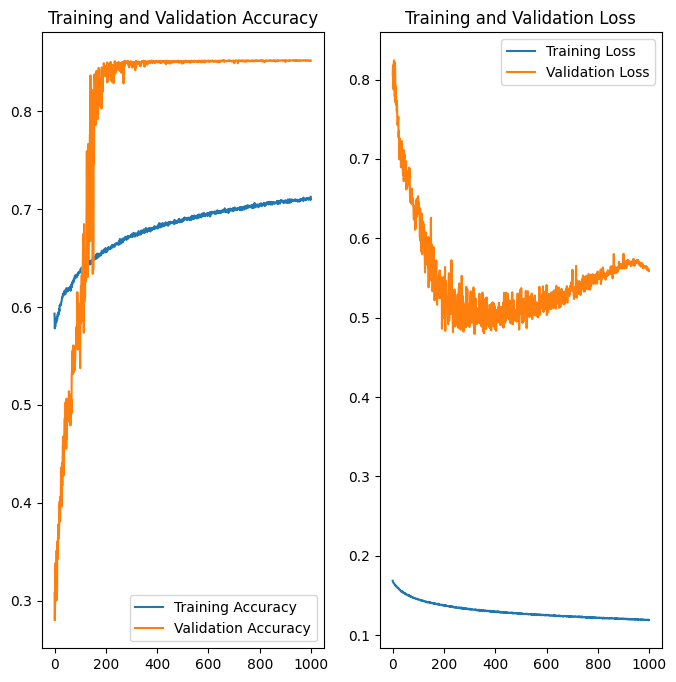

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#epochs_range = range(val_epochs)
epochs_range = range(val_epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
test_loss, test_accuracy, test_brier_score = model.evaluate(
    X_test, y_test)

4234/4234 [==============================] - 3s 670us/step - loss: 0.5604 - brier_score: 0.1318 - accuracy: 0.8508


In [62]:
X_test

array([[-0.12929755,  0.28580233,  0.62396033, ..., -0.34715036,
        -0.19479488,  0.72411526],
       [ 1.39749661,  0.28597382, -0.55628111, ..., -0.54423812,
        -0.27941414, -1.38099562],
       [-0.12929755,  0.28567894, -0.06879006, ...,  0.72729326,
        -0.09228454,  0.72411526],
       ...,
       [ 1.39749661,  0.28567894, -0.50496626, ..., -0.21648118,
         2.08415372,  0.72411526],
       [-0.12929755,  0.28584852, -0.58193853, ..., -0.34715036,
        -0.08890603,  0.72411526],
       [-1.65609172,  0.28567894, -0.40233657, ..., -0.34715036,
        -0.121389  , -1.38099562]])

In [65]:
y_test[100]

1.0

In [54]:
predictions = model.predict(X_test)

4234/4234 [==============================] - 2s 558us/step


# Guardamos datos accuracy y loss

In [57]:
df = pd.DataFrame.from_dict(history.history)
df.to_csv('../../Modelos enternados/history.csv', index=False)

# Guardamos el modelo

In [58]:
path_to_save = '../../Modelos enternados/'